ARIMA and S-ARIMA (Seasonal) [link text](https://people.duke.edu/~rnau/Slides_on_ARIMA_models--Robert_Nau.pdf)

Source [link text](https://people.duke.edu/~rnau/411arim3.htm)

Parameters [link text](https://www.analyticsvidhya.com/blog/2018/08/auto-arima-time-series-modeling-python-r/)


In [2]:
!pip install pmdarima
import pandas as pd
import numpy as np
from google.colab import files 

     |████████████████████████████████| 1.4 MB 5.1 MB/s 
     |████████████████████████████████| 9.8 MB 43.0 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [3]:
# Read your csv file as dataframe
df = pd.read_csv('aapl.us.txt', index_col='Date', parse_dates = True)
# Removes any null values
df = df.dropna()

# Data for last number of years
df = df.last('5Y')

# Data after a certain point in time
# df = df.loc[df['Date'] >= '2000-01-01']

print('Shape of data', df.shape)
print(df.head(10))

# Choose your attribute "Open", "High", "Low", "Close", "Volume", "OpenInt"
attribute = 'Close'

Shape of data (1226, 6)
              Open    High     Low   Close     Volume  OpenInt
Date                                                          
2013-01-02  71.553  71.705  69.978  70.935  154865509        0
2013-01-03  70.745  71.017  69.896  70.039   97488400        0
2013-01-04  69.375  69.591  67.936  68.088  164191192        0
2013-01-07  67.446  68.386  66.566  67.689  133721724        0
2013-01-08  68.375  68.721  67.346  67.871  126651168        0
2013-01-09  67.533  67.830  66.664  66.808  112611881        0
2013-01-10  68.287  68.310  66.607  67.636  166038770        0
2013-01-11  67.331  67.872  67.057  67.222   96900287        0
2013-01-14  64.945  65.568  64.407  64.827  202815867        0
2013-01-15  64.382  64.470  62.452  62.781  242045402        0


In [4]:
#data preprocessing

#We parse the date to the correct format
df.index = pd.to_datetime(df.index)
#df.info()

df_month = df.groupby(pd.Grouper(freq='M')).mean()
df_quarter = df.groupby(pd.Grouper(freq='Q')).mean()

#creating another date column for month, year and quarter so we can 'groupby' later
# df['month'] = df.index.dt.to_period("M")
# df['year'] = df['Date'].dt.to_period("Y")
# df['quarter'] = df['Date'].dt.quarter

#df for Monthly
# df_month = df.groupby(['month']).agg(
#     mean_open = pd.NamedAgg(column='Open', aggfunc='mean'),
#     mean_high = pd.NamedAgg(column='High', aggfunc='mean'),
#     mean_low = pd.NamedAgg(column='Low', aggfunc='mean'),
#     mean_close = pd.NamedAgg(column='Close', aggfunc='mean'),
#     mean_volume = pd.NamedAgg(column='Volume', aggfunc='mean')
# )

#df for Quarterly 
# df_quarter = df.groupby(['year', 'quarter']).agg(
#     mean_open = pd.NamedAgg(column='Open', aggfunc='mean'),
#     mean_high = pd.NamedAgg(column='High', aggfunc='mean'),
#     mean_low = pd.NamedAgg(column='Low', aggfunc='mean'),
#     mean_close = pd.NamedAgg(column='Close', aggfunc='mean'),
#     mean_volume = pd.NamedAgg(column='Volume', aggfunc='mean')
# )

# df for fixed number of points
# df = df[-30:]
# df_month = df_month[-30:]
# df_year = df_year[-30:]

print(df.head(10))
print(df_month.head(10))
print(df_quarter.head(10))


              Open    High     Low   Close     Volume  OpenInt
Date                                                          
2013-01-02  71.553  71.705  69.978  70.935  154865509        0
2013-01-03  70.745  71.017  69.896  70.039   97488400        0
2013-01-04  69.375  69.591  67.936  68.088  164191192        0
2013-01-07  67.446  68.386  66.566  67.689  133721724        0
2013-01-08  68.375  68.721  67.346  67.871  126651168        0
2013-01-09  67.533  67.830  66.664  66.808  112611881        0
2013-01-10  68.287  68.310  66.607  67.636  166038770        0
2013-01-11  67.331  67.872  67.057  67.222   96900287        0
2013-01-14  64.945  65.568  64.407  64.827  202815867        0
2013-01-15  64.382  64.470  62.452  62.781  242045402        0
                 Open       High        Low      Close        Volume  OpenInt
Date                                                                         
2013-01-31  64.610619  65.169286  63.691333  64.318381  1.725797e+08      0.0
2013-02-28

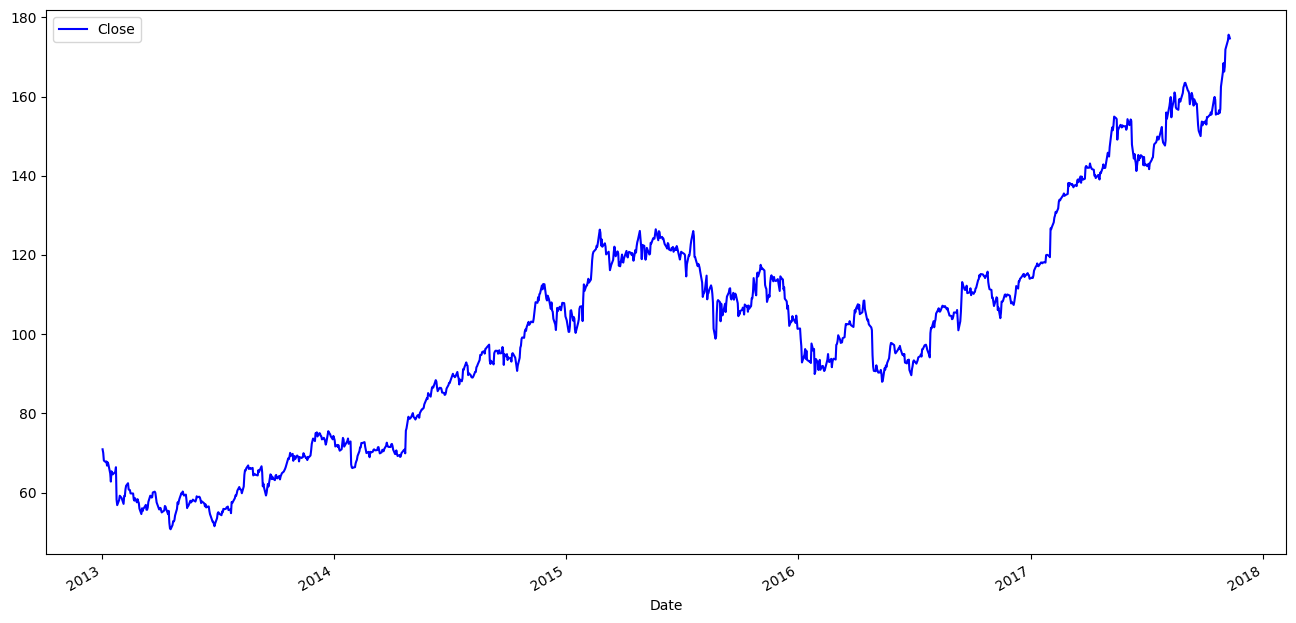

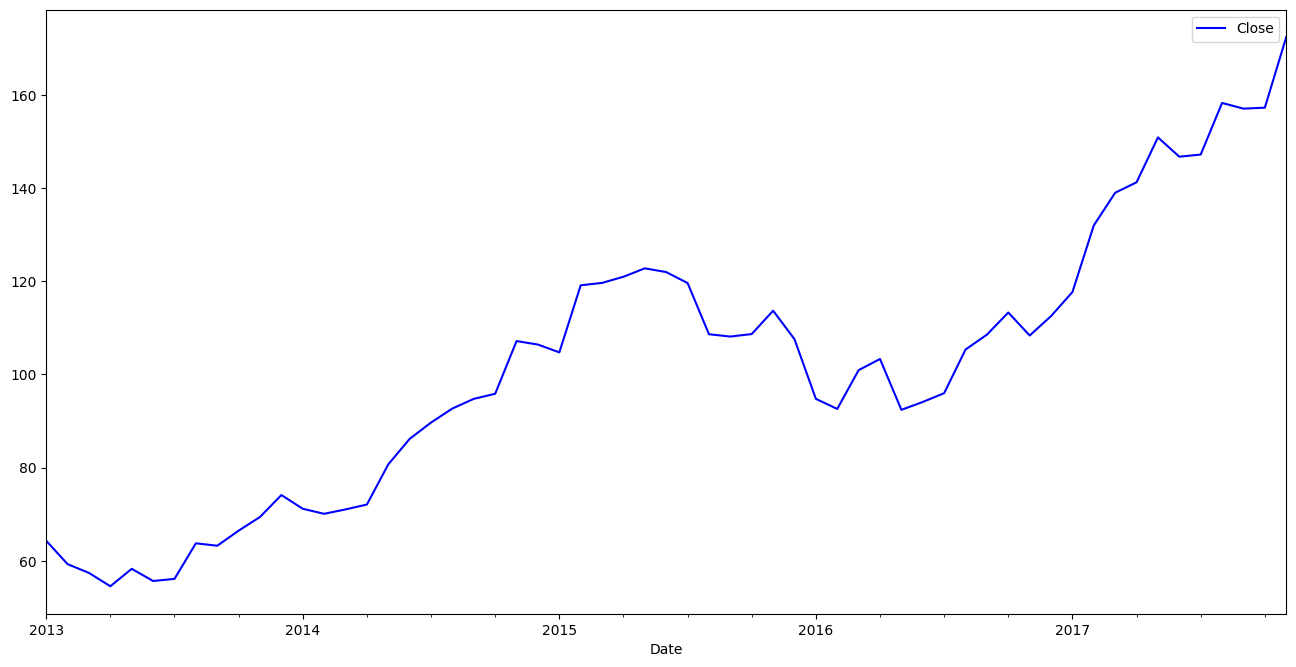

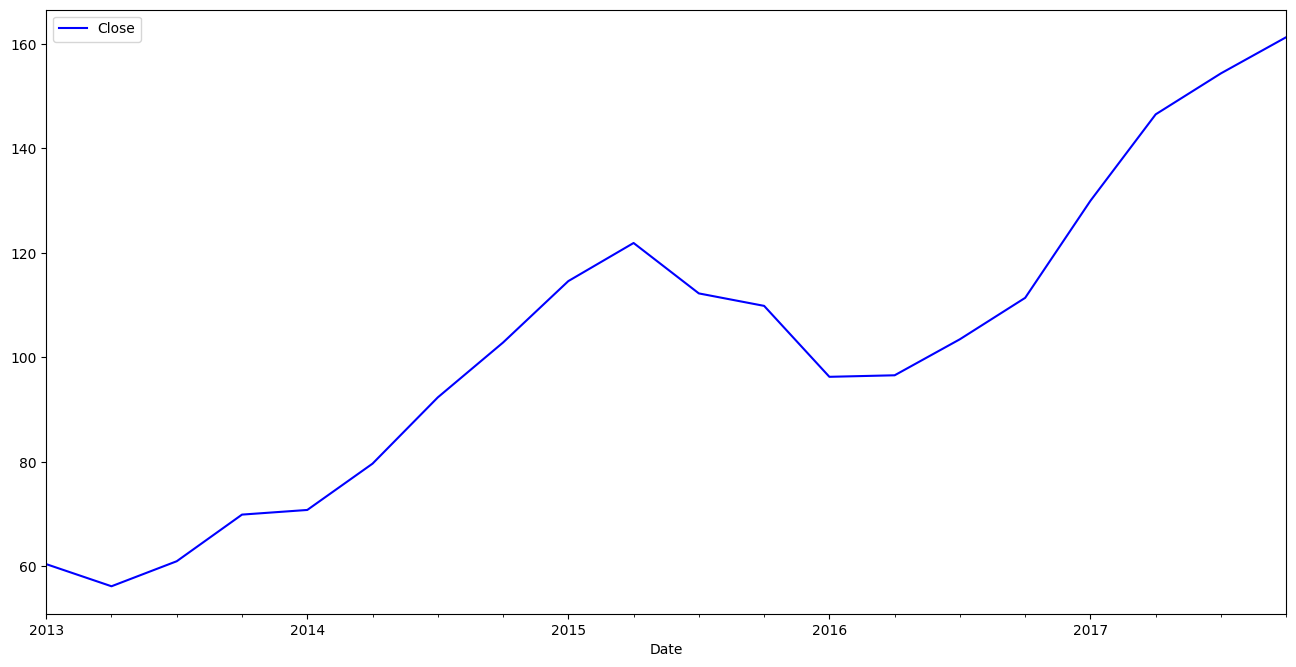

In [5]:
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
figure(figsize=(16,8), dpi=100)
df['Close'].plot(legend = True, color='blue')

figure(figsize=(16,8), dpi=100)
df_month[attribute].plot(legend = True, color='blue')

figure(figsize=(16,8), dpi=100)
df_quarter[attribute].plot(legend = True, color='blue')

# Set the correct attribute and dataset

In [6]:
#df can equal df, df_month and df_quarter
# df = df
df = df_month
# df = df_quarter
#attribute can be 'Close', 'mean_close', 
# attribute = 'Close'
# attribute = 'mean_close'

Make sure that your data is stationary

In [7]:
from statsmodels.tsa.stattools import adfuller
# This will tell us if the data is stationary
# We want to know the P-Value, we want as small as possible!
def ad_test(dataset):
  dftest = adfuller(dataset, autolag = 'AIC')
  print("1. ADF: ", dftest[0])
  print("2. P-Value: ", dftest[1])
  print("3. Num of Lags: ", dftest[2])
  print("4. Num of Observations Used for ADF Regression and Critical Values Calculation: ", dftest[3])
  print("5. Critical Values: ")
  for k, v in dftest[4].items():
    print("\t", k, ": ", v)

In [8]:
ad_test(df[attribute])

1. ADF:  0.6940321773634222
2. P-Value:  0.9897180159358087
3. Num of Lags:  0
4. Num of Observations Used for ADF Regression and Critical Values Calculation:  58
5. Critical Values: 
	 1% :  -3.548493559596539
	 5% :  -2.912836594776334
	 10% :  -2.594129155766944


In [9]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")

In [10]:
print(df.shape)
percent = 0.7 #choose between 0 and 1
num_of_train = int(df.shape[0]*(percent))
train = df.iloc[:num_of_train]
test = df.iloc[num_of_train:]
print(train.shape, test.shape)
print(train)

(59, 6)
(41, 6) (18, 6)
                  Open        High  ...        Volume  OpenInt
Date                                ...                       
2013-01-31   64.610619   65.169286  ...  1.725797e+08      0.0
2013-02-28   59.511789   60.124316  ...  1.352328e+08      0.0
2013-03-31   57.440050   58.063000  ...  1.260821e+08      0.0
2013-04-30   54.554591   55.301864  ...  1.368605e+08      0.0
2013-05-31   58.288545   58.975545  ...  1.174556e+08      0.0
2013-06-30   55.997550   56.430850  ...  9.583213e+07      0.0
2013-07-31   56.021455   56.600045  ...  8.111624e+07      0.0
2013-08-31   63.664364   64.357364  ...  9.938144e+07      0.0
2013-09-30   63.589450   64.000550  ...  1.169552e+08      0.0
2013-10-31   66.400478   67.004826  ...  9.225701e+07      0.0
2013-11-30   69.239750   69.847950  ...  7.046173e+07      0.0
2013-12-31   74.254857   74.745810  ...  9.054283e+07      0.0
2014-01-31   71.271524   71.897095  ...  1.130176e+08      0.0
2014-02-28   69.978263   70.655

In [11]:
# The magic
#SEASONAL PERIOD SET TO M: Daily = 7, Monthly = 12, Weekly = 52, Quarterly = 4, 1 = Annual
stepwise_fit = auto_arima(train[attribute], trace = True, seasonal=True, m = 12, suppress_warnings = True, n_jobs=-1)
#model_auto = auto_arima(train[attribute], seasonal = True, m = 12, n_jobs=-1)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=0.77 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=252.789, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=255.907, Time=0.09 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=255.043, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=251.454, Time=0.01 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=254.737, Time=0.06 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=254.674, Time=0.05 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=inf, Time=0.23 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=254.106, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=253.588, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=inf, Time=0.16 sec

Best model:  ARIMA(0,1,0)(0,0,0)[12]          
Total fit time: 1.604 seconds


In [12]:
#model_auto.summary()
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   41
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -124.727
Date:                Fri, 12 Nov 2021   AIC                            251.454
Time:                        15:32:41   BIC                            253.143
Sample:                             0   HQIC                           252.065
                                 - 41                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2        29.9194      5.727      5.224      0.000      18.694      41.145
===================================================================================
Ljung-Box (L1) (Q):                   0.64   Jarque-Bera (JB):                 1.31
Prob(Q):                              0.42   Prob(JB):                         0.52
Heteroskedasticity (H):               3.32   Skew:                            -0.15
Prob(H) (two-sided):                  0.04   Kurtosis:                         3.83
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# Explaining why the model selects the parameters

Given (p, d, q) where d is the differencing done to make the data stationary. We plot this below to explain how the differencing has now affected the graph and its p-value!

1. ADF:  -1.7868994550214548
2. P-Value:  0.3869848731486165
3. Num of Lags:  4
4. Num of Observations Used for ADF Regression and Critical Values Calculation:  52
5. Critical Values: 
	 1% :  -3.562878534649522
	 5% :  -2.918973284023669
	 10% :  -2.597393446745562


<Figure size 8000x4000 with 0 Axes>

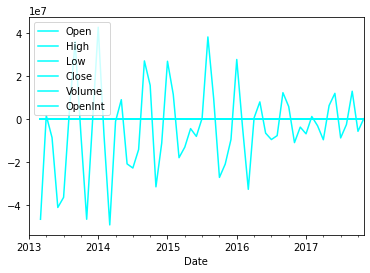

In [13]:
from matplotlib.pyplot import figure
figure(figsize=(20,10), dpi=400)
df.diff(2).plot(legend = True, color='cyan', )
ad_test(df.diff(2).dropna()[attribute])

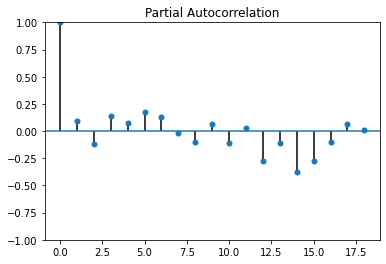

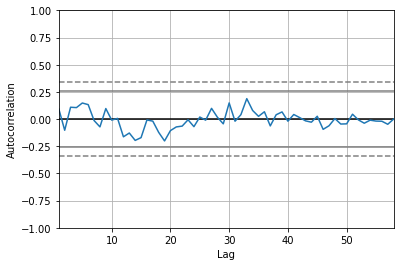

In [14]:
from pmdarima.utils import *
differencing = 1
plot_pacf(df[attribute].diff(differencing).dropna(), show=True) 
autocorr_plot(df[attribute].diff(differencing).dropna(), show=True) 
#decomposed_plot(df[attribute], show=True) 

# Fitting the model

In the previous cells, we have determined the parameters for the model with auto_arima. 
> Here, we can either make use of 
1.   statsmodels library to fit the model OR
2.   continue using pmdarima library


# pmdarima.ARIMA

In [15]:
import pmdarima as pm

model = pm.ARIMA(order = (0,1,0), seasonal_order=(0,0,0,12))
model.fit(train[attribute])

start = len(train)
end = len(train) + len(test) - 1
pred = model.predict(n_periods = len(test))
pred = pd.DataFrame(pred)
pred.index = df.index[start:end+1]

# from matplotlib.pyplot import figure
# figure(figsize=(20,10), dpi=400)
# pred.plot(legend = True, color='cyan', )
# test[attribute].plot(legend = True, color='red')
# train[attribute].plot(legend = True, color='blue')

In [16]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   41
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -124.395
Date:                Fri, 12 Nov 2021   AIC                            252.789
Time:                        15:32:42   BIC                            256.167
Sample:                             0   HQIC                           254.010
                                 - 41                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.7024      0.861      0.816      0.415      -0.986       2.390
sigma2        29.4252      5.551      5.301      0.000      18.546      40.305
===================================================================================
Ljung-Box (L1) (Q):                   0.64   Jarque-Bera (JB):                 1.31
Prob(Q):                              0.42   Prob(JB):                         0.52
Heteroskedasticity (H):               3.63   Skew:                            -0.15
Prob(H) (two-sided):                  0.03   Kurtosis:                         3.83
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# We can observe the models diagnostics.

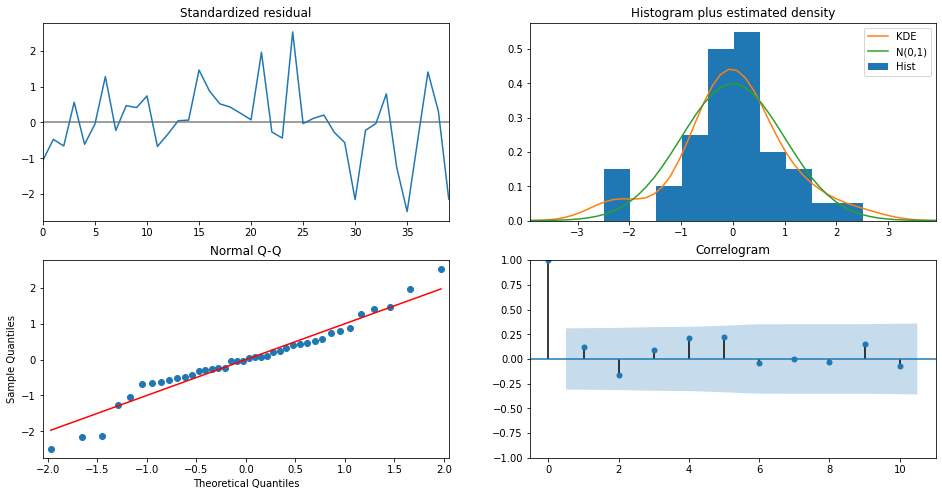

In [17]:
import matplotlib.pyplot as plt
model.plot_diagnostics(figsize=(16,8))
plt.show()

Here, we predict without updating model parameters along the way.

<Figure size 8000x4000 with 0 Axes>

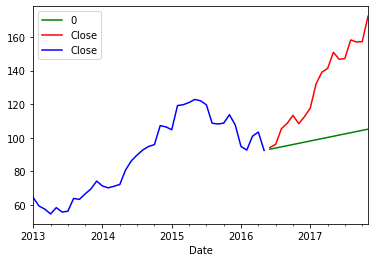

In [18]:
from matplotlib.pyplot import figure
figure(figsize=(20,10), dpi=400)
pred.plot(legend = True, color='green', )
test[attribute].plot(legend = True, color='red')
train[attribute].plot(legend = True, color='blue')

In [ ]:
from sklearn.metrics import mean_squared_error
import math

rmse = math.sqrt(mean_squared_error(test[attribute], pred))
print(rmse)

37.65517189816884


# Generate in-sample predictions from the fit ARIMA model.

Predicts the original training (in-sample) time series values. This can be useful when wanting to visualize the fit, and qualitatively inspect the efficacy of the model, or when wanting to compute the residuals of the model.



In [ ]:
in_sample = model.predict_in_sample()
in_sample = pd.DataFrame(in_sample)
in_sample.index = train.index

<Figure size 8000x4000 with 0 Axes>

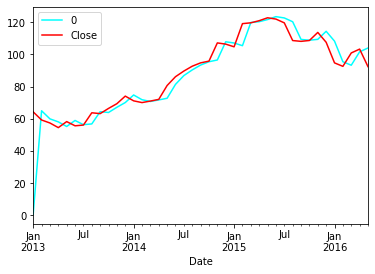

In [ ]:
from matplotlib.pyplot import figure
figure(figsize=(20,10), dpi=400)
in_sample.plot(legend = True, color='cyan')
train[attribute].plot(legend = True, color='red')


# Can we do better? - Step wise forecasting




This is different from earlier part where we just predict for the entire 30% range at one go. Here, we are predicting one step and then check the actual and make auto adjustments to the model.

Update the model fit with additional observed endog/exog values.

Updating an ARIMA adds new observations to the model, updating the MLE of the parameters accordingly by performing several new iterations (maxiter) from the existing model parameters.

Notes:
> Internally, this calls fit again using the OLD model parameters as the starting parameters for the new model’s MLE computation.




In [ ]:
from sklearn.metrics import mean_squared_error
from pmdarima.metrics import smape
import math

y_train = train[attribute]
y_test = test[attribute]

def stepwise_forecast():
    fc, conf_int = model.predict(n_periods=1, return_conf_int=True)
    return (
        fc.tolist()[0],
        np.asarray(conf_int).tolist()[0])

forecasts = []
confidence_intervals = []

for new_ob in test[attribute]:
    #fc - forecast 
    #conf - confidence interval
    fc, conf = stepwise_forecast()
    forecasts.append(fc)
    confidence_intervals.append(conf)

    # Updates the existing model with a small number of MLE steps
    # update(new_ob) = Step-wise, use real test values
    # update(fc) = Dynamic, use new forecasts
    model.update(new_ob) #It will take into account the actual outcome

print(f"Mean squared error: {mean_squared_error(y_test, forecasts)}")
print(f"SMAPE: {smape(y_test, forecasts)}")
print(f"Root Mean squared error: {math.sqrt(mean_squared_error(y_test, forecasts))}")
# Mean squared error: 0.34238951346274243
# SMAPE: 0.9825490519101439

Mean squared error: 41.67859849935806
SMAPE: 3.920960448751045
Root Mean squared error: 6.4558964133076095


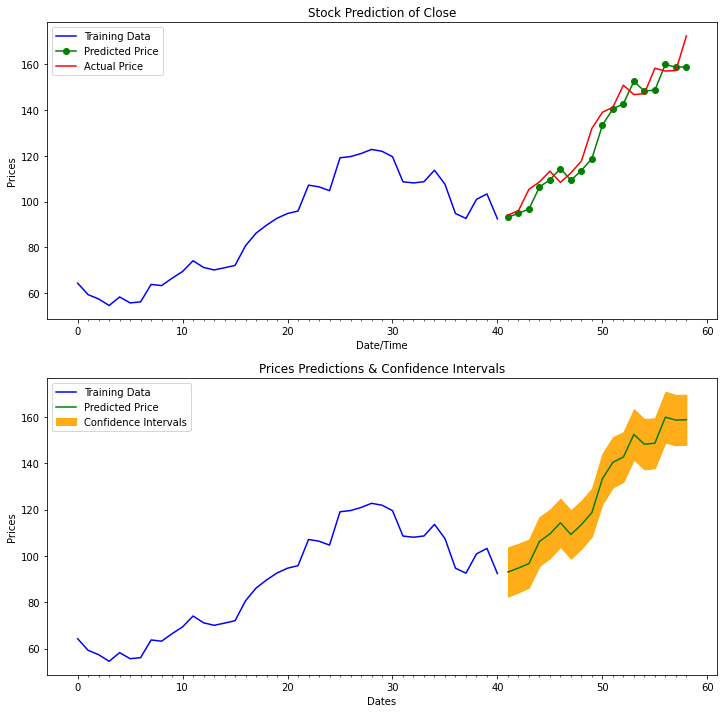

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 1, figsize=(12, 12))

# --------------------- Actual vs. Predicted --------------------------
#y_train = train[attribute]
#test_data = test[attribute]

axes[0].plot(np.array(train[attribute]), color='blue', label='Training Data')
axes[0].plot([len(train[attribute])+i for i in range(len(test[attribute]))], forecasts, color='green', marker='o', label='Predicted Price')

axes[0].plot([len(train[attribute])+i for i in range(len(test[attribute]))], test[attribute], color='red', label='Actual Price')
axes[0].set_title('Stock Prediction of ' + attribute)
axes[0].set_xlabel('Date/Time')
axes[0].set_ylabel('Prices')

axes[0].set_xticks([i for i in range(len(df[attribute]))], [i for i in range(len(df[attribute]))])
axes[0].legend()

# ------------------ Predicted with confidence intervals ----------------
axes[1].plot(np.array(y_train), color='blue', label='Training Data')
axes[1].plot([len(train[attribute])+i for i in range(len(test[attribute]))], forecasts, color='green',
             label='Predicted Price')

axes[1].set_title('Prices Predictions & Confidence Intervals')
axes[1].set_xlabel('Dates')
axes[1].set_ylabel('Prices')

conf_int = np.asarray(confidence_intervals)
axes[1].fill_between([len(train[attribute])+i for i in range(len(test[attribute]))],
                     conf_int[:, 0], conf_int[:, 1],
                     alpha=0.9, color='orange',
                     label="Confidence Intervals")

axes[1].set_xticks([i for i in range(len(df[attribute]))], [i for i in range(len(df[attribute]))])
axes[1].legend()



# Dynamic Forecasting
Uses each new forecast to make next prediction

In [ ]:
model = pm.ARIMA(order = (0,1,0), seasonal_order=(1, 0, 0, 7))
model.fit(train[attribute])

def dynamic_forecast():
    fc, conf_int = model.predict(n_periods=1, return_conf_int=True)
    return (
        fc.tolist()[0],
        np.asarray(conf_int).tolist()[0])

forecasts2 = []
confidence_intervals2 = []

for new_ob in test[attribute]:
    #fc - forecast 
    #conf - confidence interval
    fc, conf = dynamic_forecast()
    forecasts2.append(fc)
    confidence_intervals2.append(conf)

    # Updates the existing model with a small number of MLE steps
    # update(new_ob) = Step-wise, use real test values
    # update(fc) = Dynamic, use new forecasts
    model.update(fc) #It will take into account the actual outcome

print(f"Mean squared error: {mean_squared_error(y_test, forecasts2)}")
print(f"SMAPE: {smape(y_test, forecasts2)}")
print(f"Root Mean squared error: {math.sqrt(mean_squared_error(y_test, forecasts2))}")
# Mean squared error: 0.34238951346274243
# SMAPE: 0.9825490519101439

Mean squared error: 1428.7565316328348
SMAPE: 26.16335753917619
Root Mean squared error: 37.798895904944565


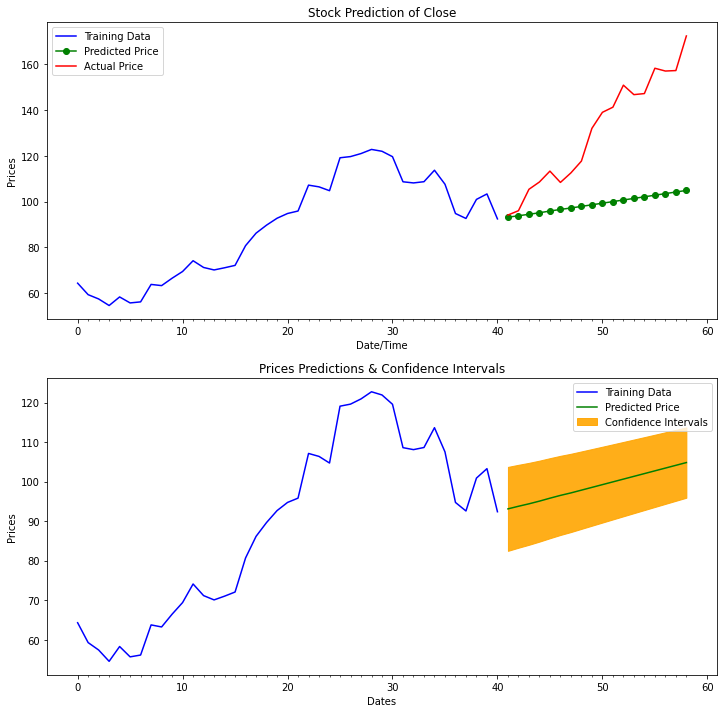

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 1, figsize=(12, 12))

# --------------------- Actual vs. Predicted --------------------------
#y_train = train[attribute]
#test_data = test[attribute]

axes[0].plot(np.array(train[attribute]), color='blue', label='Training Data')
axes[0].plot([len(train[attribute])+i for i in range(len(test[attribute]))], forecasts2, color='green', marker='o', label='Predicted Price')

axes[0].plot([len(train[attribute])+i for i in range(len(test[attribute]))], test[attribute], color='red', label='Actual Price')
axes[0].set_title('Stock Prediction of ' + attribute)
axes[0].set_xlabel('Date/Time')
axes[0].set_ylabel('Prices')

axes[0].set_xticks([i for i in range(len(df[attribute]))], [i for i in range(len(df[attribute]))])
axes[0].legend()

# ------------------ Predicted with confidence intervals ----------------
axes[1].plot(np.array(y_train), color='blue', label='Training Data')
axes[1].plot([len(train[attribute])+i for i in range(len(test[attribute]))], forecasts2, color='green',
             label='Predicted Price')

axes[1].set_title('Prices Predictions & Confidence Intervals')
axes[1].set_xlabel('Dates')
axes[1].set_ylabel('Prices')

conf_int = np.asarray(confidence_intervals2)
axes[1].fill_between([len(train[attribute])+i for i in range(len(test[attribute]))],
                     conf_int[:, 0], conf_int[:, 1],
                     alpha=0.9, color='orange',
                     label="Confidence Intervals")

axes[1].set_xticks([i for i in range(len(df[attribute]))], [i for i in range(len(df[attribute]))])
axes[1].legend()



If you want to look further into the future use LSTM, if you can afford to run stepwise then ARIMA is also a good option. 